In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mrmorj_dataset_of_songs_in_spotify_path = kagglehub.dataset_download('mrmorj/dataset-of-songs-in-spotify')

print('Data source import complete.')


100%|██████████| 3.06M/3.06M [00:00<00:00, 72.3MB/s]

Extracting files...


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras

# Load the data
df = pd.read_csv("/content/genres_v2.csv.zip",low_memory=False)

#See Values of Each Genre
df['genre'].value_counts()

,count
genre,
Underground Rap,5875
Dark Trap,4578
Hiphop,3028
trance,2999
trap,2987
techhouse,2975
dnb,2966
psytrance,2961
techno,2956


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [5]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [6]:
df = df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'title','time_signature','Unnamed: 0'], axis=1)
df.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0.831,0.814,2,-7.364,1,0.42,0.0598,0.0134,0.0556,0.389,156.985,124539,Dark Trap


In [7]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000


In [8]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'genre'],
      dtype='object')

In [9]:
df['genre'].value_counts()

,count
genre,
Underground Rap,5875
Dark Trap,4578
Hiphop,3028
trance,2999
trap,2987
techhouse,2975
dnb,2966
psytrance,2961
techno,2956


In [10]:
df = df.replace("Trap Metal", "trap")
df = df.replace("Underground Rap", "Rap")
df = df.replace("Emo", "Rap")
df = df.replace("RnB", "Rap")
df = df.replace("Hiphop", "Rap")
df = df.replace("Dark Trap", "trap")

df = df[df['genre']!='Pop']
df['genre'].value_counts()

,count
genre,
Rap,14530
trap,9521
trance,2999
techhouse,2975
dnb,2966
psytrance,2961
techno,2956
hardstyle,2936


In [11]:
trap_indices = df[df['genre'] == 'trap'].index
selected_trap_indices = np.random.choice(trap_indices, 6000, replace=False)
df = df.drop(selected_trap_indices)
df['genre'].value_counts()

,count
genre,
Rap,14530
trap,3521
trance,2999
techhouse,2975
dnb,2966
psytrance,2961
techno,2956
hardstyle,2936


In [12]:
rap_indices = df[df['genre'] == 'Rap'].index
selected_rap_indices = np.random.choice(rap_indices,11_000,replace=False)
df = df.drop(selected_rap_indices)
df['genre'].value_counts()

,count
genre,
Rap,3530
trap,3521
trance,2999
techhouse,2975
dnb,2966
psytrance,2961
techno,2956
hardstyle,2936


Text(0.5, 1.0, 'genres')

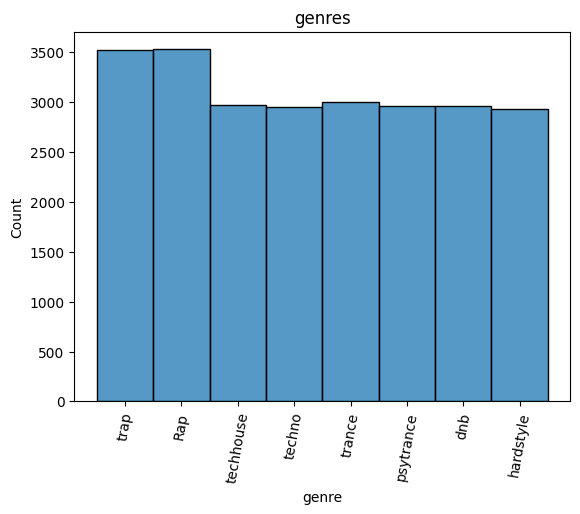

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df["genre"])
plt.xticks(rotation=80)
plt.title("genres")

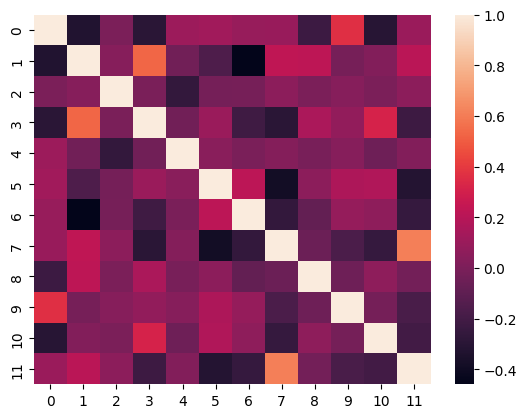

In [14]:
model = keras.models.Sequential()
y = df['genre']
df= df.drop(['genre'], axis=1)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
y = ohe.fit_transform(np.array(y).reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42,shuffle=True)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

ax = sns.heatmap(pd.DataFrame(X_train).corr())

In [16]:
model.add(keras.layers.Input(name="input", shape=(X_train.shape[1],)))
# Changed shape to (X_train.shape[1],) to make it a tuple
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(8,activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,808 (65.66 KB)

 Trainable params: 16,616 (64.91 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4946 - loss: 1.4659 - learning_rate: 0.0010
Epoch 2/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7441 - loss: 0.7447 - learning_rate: 0.0010
Epoch 3/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7844 - loss: 0.6415 - learning_rate: 0.0010
Epoch 4/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7933 - loss: 0.5863 - learning_rate: 0.0010
Epoch 5/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8026 - loss: 0.5531 - learning_rate: 0.0010
Epoch 6/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8071 - loss: 0.5398 - learning_rate: 0.0010
Epoch 7/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8145 - loss: 0.5010 - learning_rate: 0.0010
Epoch 8/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8215 - loss: 0.4883 - learning_rate: 0.0010
Epoch 9/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8193 - loss: 0.4885 - learning_rate: 0.0010
E

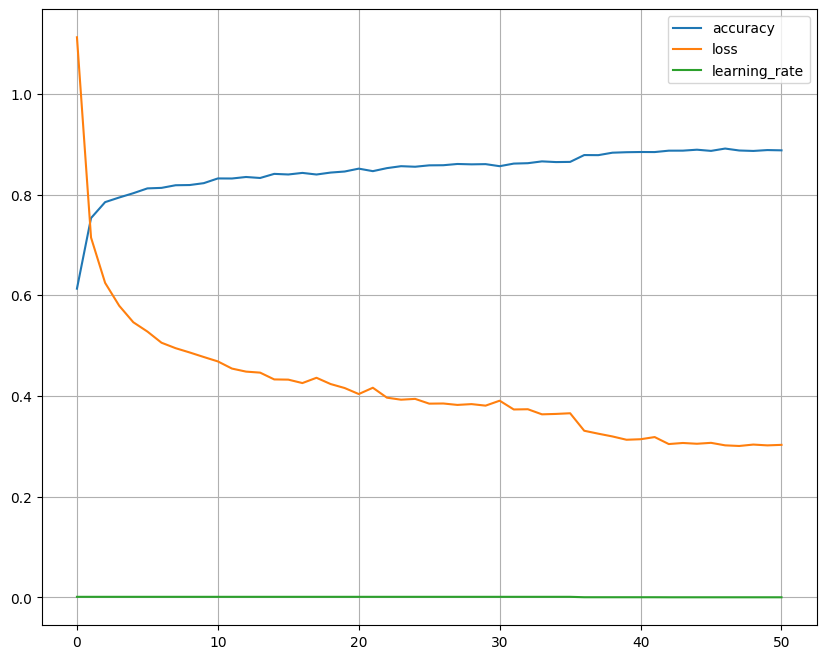

In [17]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=2, min_lr=0.0001)
early_stop = EarlyStopping(monitor='accuracy',patience=4)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs=100,callbacks=[reduce_lr,early_stop], batch_size = 64,
                  shuffle=True)

pd.DataFrame(history.history).plot(figsize=(10,8))
plt.grid(True)